In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline


In [19]:
df = pd.read_csv("news.csv")

df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [20]:
df.shape


(6335, 4)

<AxesSubplot:xlabel='label', ylabel='count'>

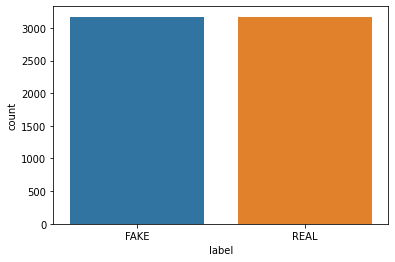

In [13]:
sns.countplot("label", data=df)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
labels=df.label	
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [36]:
df.iloc[0]

Unnamed: 0                                                 8476
title                              You Can Smell Hillary’s Fear
text          Daniel Greenfield, a Shillman Journalism Fello...
label                                                      FAKE
Name: 0, dtype: object

### now split our dataset into training and testing sets

In [38]:

x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

#### A TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

In [39]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

## Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

##  PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.

In [65]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.98%


## Confusion_matrix

In [43]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[590,  48],
       [ 41, 588]], dtype=int64)